In [1]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files
import requests

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

import json # library to handle JSON files
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2019.9.11  |       hecc5488_0         144 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    certifi-2019.9.11          |           py36_0         147 KB  conda-forge
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0         conda-forge
    geopy:           1.20.0-py_0       conda-forge

The following packages will be UPDATED:

    cer

In [2]:

import types
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_0fb7b54bfc9c47dd9bb12d83f1c6b562 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='fJLFYVKpnHUI-i2YAjKpWwSyknrTiyI7r5u_GyQhOjm8',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_0fb7b54bfc9c47dd9bb12d83f1c6b562.get_object(Bucket='courseracapstonefinalproject-donotdelete-pr-mdbbzrylll1exi',Key='Chicago_Neighborhood.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_chicago = pd.read_csv(body)
df_chicago.head()


,PostalCode,Neighborhood
0,60625,Albany Park
1,60630,Mayfair
2,60630,North Mayfair
3,60625,Ravenswood Manor
4,60632,Archer Heights


In [3]:
df_chicago.shape
del df_chicago['PostalCode']

In [4]:
latitude = []
longitude = []
chi_area = []
for area in df_chicago['Neighborhood']:
  address = area + ", Chicago, Illinois, USA"  
  geolocator = Nominatim(user_agent="Chicago_explorer",timeout=10)
  location = geolocator.geocode(address)
  if location:
    latitude.append(location.latitude)
    longitude.append(location.longitude)
    chi_area.append(area)

df_chicago = pd.DataFrame({'Neighborhood': chi_area, 'Latitude': latitude,'Longitude':longitude})
#df_chicago['Latitude']=latitude #Adding a column in the main dataframe for Latitude  
#df_chicago['Longitude']=longitude #Adding a column in the main dataframe for Longitude

In [5]:
print(df_chicago.head())
print(df_chicago.shape)

        Neighborhood   Latitude  Longitude
0       Albany Park   41.971937 -87.716174
1           Mayfair   41.968087 -87.737837
2     North Mayfair   41.968087 -87.737837
3  Ravenswood Manor   41.964622 -87.701380
4    Archer Heights   41.811422 -87.726165
(222, 3)


Chicago Neighborhoods in Folium Map
Folium makes it easy to visualize data that’s been manipulated in Python on an interactive leaflet map. 
It enables both the binding of data to a map for choropleth visualizations as well as passing rich vector/raster/HTML visualizations as markers on the map.

In [6]:
import warnings
warnings.filterwarnings('ignore')
address = 'Chicago,Illinois'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude_x = location.latitude
longitude_y = location.longitude
print('The geograpical coordinate of Chicago,Illinois are {}, {}.'.format(latitude_x, longitude_y))

The geograpical coordinate of Chicago,Illinois are 41.8755616, -87.6244212.


In [7]:
map_chicago = folium.Map(location=[latitude_x, longitude_y], zoom_start=10)

# add markers to map
for lat, lng, nei in zip(df_chicago['Latitude'], df_chicago['Longitude'], df_chicago['Neighborhood']):
    
    label = '{}'.format(nei)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_chicago)  
    
map_chicago

Use FourSquare venues to get near by venues

In [8]:
latitude_n1 = latitude_x
longitude_n1 = longitude_y
print('The geograpical coordinate of neighborhood_1 are {}, {}.'.format(latitude_x, longitude_y))

CLIENT_ID = 'TZW3OOD5YPYPAHK2GAGRFM44MKFP0NWGPNALMSKYNTQ30JET' # your Foursquare ID
CLIENT_SECRET = 'FLH0I3C5LH4JKOOAYQLBNOXWJMMWCD3LD5SVW1OTHIZECY1T' # your Foursquare Secret
VERSION = '20181216'

The geograpical coordinate of neighborhood_1 are 41.8755616, -87.6244212.


In [9]:
radius = 700 
LIMIT = 100
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude_n1, 
   longitude_n1, 
    radius, 
   LIMIT)

In [10]:
results = requests.get(url).json()
venues=results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues)
nearby_venues.columns

Index(['reasons.count', 'reasons.items', 'referralId', 'venue.categories',
       'venue.delivery.id', 'venue.delivery.provider.icon.name',
       'venue.delivery.provider.icon.prefix',
       'venue.delivery.provider.icon.sizes', 'venue.delivery.provider.name',
       'venue.delivery.url', 'venue.id', 'venue.location.address',
       'venue.location.cc', 'venue.location.city', 'venue.location.country',
       'venue.location.crossStreet', 'venue.location.distance',
       'venue.location.formattedAddress', 'venue.location.labeledLatLngs',
       'venue.location.lat', 'venue.location.lng',
       'venue.location.neighborhood', 'venue.location.postalCode',
       'venue.location.state', 'venue.name', 'venue.photos.count',
       'venue.photos.groups', 'venue.venuePage.id'],
      dtype='object')

In [11]:
#Define a function to get Category Type
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [12]:
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]
nearby_venues.head()

,venue.name,venue.categories,venue.location.lat,venue.location.lng
0,Auditorium Theatre,"[{'id': '4bf58dd8d48988d137941735', 'name': 'T...",41.876058,-87.625303
1,Cafecito,"[{'id': '4bf58dd8d48988d154941735', 'name': 'C...",41.875724,-87.626386
2,Osaka Sushi Express & Fresh Fruit Smoothies,"[{'id': '4bf58dd8d48988d1d2941735', 'name': 'S...",41.876969,-87.624534
3,Dunkin',"[{'id': '4bf58dd8d48988d148941735', 'name': 'D...",41.876768,-87.624575
4,Hostelling International Chicago,"[{'id': '4bf58dd8d48988d1ee931735', 'name': 'H...",41.875757,-87.626537


In [13]:
nearby_venues.head(9)

,venue.name,venue.categories,venue.location.lat,venue.location.lng
0,Auditorium Theatre,"[{'id': '4bf58dd8d48988d137941735', 'name': 'T...",41.876058,-87.625303
1,Cafecito,"[{'id': '4bf58dd8d48988d154941735', 'name': 'C...",41.875724,-87.626386
2,Osaka Sushi Express & Fresh Fruit Smoothies,"[{'id': '4bf58dd8d48988d1d2941735', 'name': 'S...",41.876969,-87.624534
3,Dunkin',"[{'id': '4bf58dd8d48988d148941735', 'name': 'D...",41.876768,-87.624575
4,Hostelling International Chicago,"[{'id': '4bf58dd8d48988d1ee931735', 'name': 'H...",41.875757,-87.626537
5,SummerDance,"[{'id': '4bf58dd8d48988d134941735', 'name': 'D...",41.873804,-87.623335
6,Fontano's Pizza and Subs,"[{'id': '4bf58dd8d48988d1ca941735', 'name': 'P...",41.877157,-87.624348
7,Auditorium Building,"[{'id': '5032792091d4c4b30a586d5c', 'name': 'C...",41.875858,-87.624565
8,Congress Plaza,"[{'id': '4bf58dd8d48988d164941735', 'name': 'P...",41.875684,-87.624015


In [14]:
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Auditorium Theatre,Theater,41.876058,-87.625303
1,Cafecito,Cuban Restaurant,41.875724,-87.626386
2,Osaka Sushi Express & Fresh Fruit Smoothies,Sushi Restaurant,41.876969,-87.624534
3,Dunkin',Donut Shop,41.876768,-87.624575
4,Hostelling International Chicago,Hostel,41.875757,-87.626537


In [15]:
#Define function to get Near by venues 
def getNearbyVenues(names, latitudes, longitudes, radius=700):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
        CLIENT_SECRET, 
            VERSION,
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        venue_results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in venue_results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [16]:
chicago_venues = getNearbyVenues(names=df_chicago['Neighborhood'],
                                   latitudes=df_chicago['Latitude'],
                                   longitudes=df_chicago['Longitude']
                                  )

In [17]:
chicago_venues.groupby('Neighborhood').count().head()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Albany Park,37,37,37,37,37,37
Altgeld Gardens,1,1,1,1,1,1
Andersonville,81,81,81,81,81,81
Archer Heights,32,32,32,32,32,32
Armour Square,30,30,30,30,30,30


In [18]:
print('There are {} uniques categories.'.format(len(chicago_venues['Venue Category'].unique())))

There are 369 uniques categories.


In [19]:

chicago_onehot = pd.get_dummies(chicago_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
chicago_onehot['Neighborhood'] = chicago_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [chicago_onehot.columns[-1]] + list(chicago_onehot.columns[:-1])
chicago_onehot = chicago_onehot[fixed_columns]
chicago_onehot.head()

,Neighborhood,ATM,Accessories Store,Adult Boutique,African Restaurant,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auditorium,Auto Dealership,Auto Workshop,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Campground,Candy Store,Caribbean Restaurant,Cheese Shop,Child Care Service,Chinese Restaurant,Chiropractor,Chocolate Shop,Circus,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Cafeteria,College Gym,College Rec Center,College Stadium,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Costume Shop,Creperie,Cruise,Cuban Restaurant,Cupcake Shop,Currency Exchange,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distillery,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Dry Cleaner,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Eye Doctor,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Football Stadium,Fountain,Frame Store,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Heliport,Hill,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,IT Services,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Indoor Play Area,Insurance Office,Intersection,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Laundromat,Laundry Service,Lawyer,Leather Goods Store,Library,Light Rail Station,Lingerie Store,Liquor Store,Locksmith,Lounge,Mac & Cheese Joint,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Military Base,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Movie Theater,Moving Target,Multiplex,Museum,Music Store,Music Venue,Nail Salon,Nature Preserve,New American Restaurant,Nightclub,Non-Profit,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Nightlife,Other Repair Shop,Outdoor Sculpture,Outdoor Supply Store,Outdoors & Recreation,Pakistani Restaurant,Paper / Office Supplies Store,Park,Parking,Pastry Shop,Pawn Shop,Performing Arts Venue,Peruvian Restaurant,Pet Service,Pet Store,Pharmacy,Piano Bar,Pie Shop,Pier,Pizza Place,Platform,Playground,Plaza,Poke Place,Polish Restaurant,Pool,Pool Hall,Portuguese Restaurant,Post Office,Print Shop,Pub,Public Art,Radio Station,Ramen Restaurant,Record Shop,Recording Studio,Recreation 

In [20]:
chicago_onehot.shape

(9217, 370)

In [21]:
chicago_grouped = chicago_onehot.groupby('Neighborhood').mean().reset_index()
chicago_grouped.head()

,Neighborhood,ATM,Accessories Store,Adult Boutique,African Restaurant,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auditorium,Auto Dealership,Auto Workshop,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Campground,Candy Store,Caribbean Restaurant,Cheese Shop,Child Care Service,Chinese Restaurant,Chiropractor,Chocolate Shop,Circus,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Cafeteria,College Gym,College Rec Center,College Stadium,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Costume Shop,Creperie,Cruise,Cuban Restaurant,Cupcake Shop,Currency Exchange,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distillery,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Dry Cleaner,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Eye Doctor,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Football Stadium,Fountain,Frame Store,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Heliport,Hill,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,IT Services,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Indoor Play Area,Insurance Office,Intersection,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Laundromat,Laundry Service,Lawyer,Leather Goods Store,Library,Light Rail Station,Lingerie Store,Liquor Store,Locksmith,Lounge,Mac & Cheese Joint,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Military Base,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Movie Theater,Moving Target,Multiplex,Museum,Music Store,Music Venue,Nail Salon,Nature Preserve,New American Restaurant,Nightclub,Non-Profit,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Nightlife,Other Repair Shop,Outdoor Sculpture,Outdoor Supply Store,Outdoors & Recreation,Pakistani Restaurant,Paper / Office Supplies Store,Park,Parking,Pastry Shop,Pawn Shop,Performing Arts Venue,Peruvian Restaurant,Pet Service,Pet Store,Pharmacy,Piano Bar,Pie Shop,Pier,Pizza Place,Platform,Playground,Plaza,Poke Place,Polish Restaurant,Pool,Pool Hall,Portuguese Restaurant,Post Office,Print Shop,Pub,Public Art,Radio Station,Ramen Restaurant,Record Shop,Recording Studio,Recreation 

In [22]:
chicago_grouped.shape

(221, 370)

In [23]:
num_top_venues = 5
for hood in chicago_grouped['Neighborhood'][:3]:
    print("----"+hood+"----")
    temp = chicago_grouped[chicago_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Albany Park ----
                venue  freq
0  Mexican Restaurant  0.08
1  Chinese Restaurant  0.05
2         Coffee Shop  0.05
3       Grocery Store  0.05
4   Korean Restaurant  0.05


----Altgeld Gardens ----
                   venue  freq
0                   Park   1.0
1           Noodle House   0.0
2  Outdoors & Recreation   0.0
3   Outdoor Supply Store   0.0
4      Outdoor Sculpture   0.0


----Andersonville ----
                       venue  freq
0  Middle Eastern Restaurant  0.04
1             Sandwich Place  0.04
2                Coffee Shop  0.04
3             Breakfast Spot  0.04
4          Korean Restaurant  0.02




In [24]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [25]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = chicago_grouped['Neighborhood']

for ind in np.arange(chicago_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(chicago_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Albany Park,Mexican Restaurant,Sandwich Place,Grocery Store,Korean Restaurant,Chinese Restaurant,Coffee Shop,Bakery,Restaurant,Supermarket,Gift Shop
1,Altgeld Gardens,Park,Yoga Studio,Farm,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Eye Doctor
2,Andersonville,Coffee Shop,Breakfast Spot,Middle Eastern Restaurant,Sandwich Place,Korean Restaurant,Thrift / Vintage Store,Grocery Store,New American Restaurant,Pizza Place,Gym / Fitness Center
3,Archer Heights,Mexican Restaurant,Mobile Phone Shop,Bakery,Gas Station,Grocery Store,Coffee Shop,Restaurant,Optical Shop,Candy Store,Sandwich Place
4,Armour Square,Chinese Restaurant,Pizza Place,Bar,Bus Station,Soccer Field,Light Rail Station,Gas Station,Tailor Shop,Storage Facility,Sports Bar


In [26]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

Elbow Curve to find the optimum number of clusters

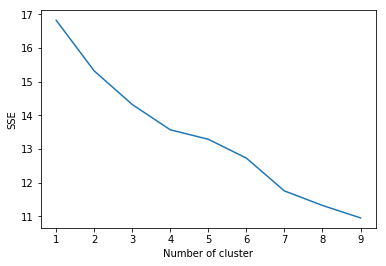

In [27]:
chicago_grouped_clustering = chicago_grouped.drop('Neighborhood', 1)
sse={}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(chicago_grouped_clustering)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [28]:
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
#import matplotlib.cm as cm
import numpy as np

Silhouette Scores and Cluster Visualizations

For 2  Clusters  the average silhouette_score is : 0.357904776364319
For 3  Clusters  the average silhouette_score is : 0.5213770216668626
For 4  Clusters  the average silhouette_score is : 0.2542776948430115
For 5  Clusters  the average silhouette_score is : 0.16692390469849966


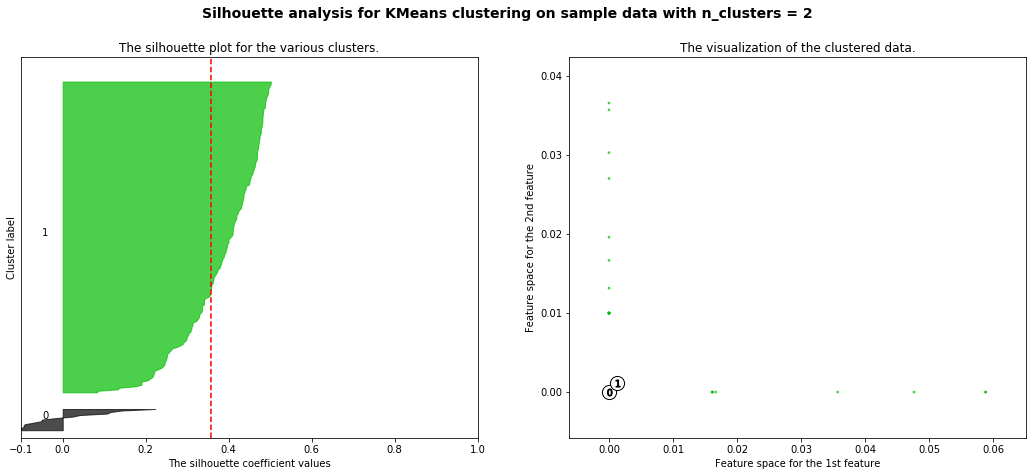

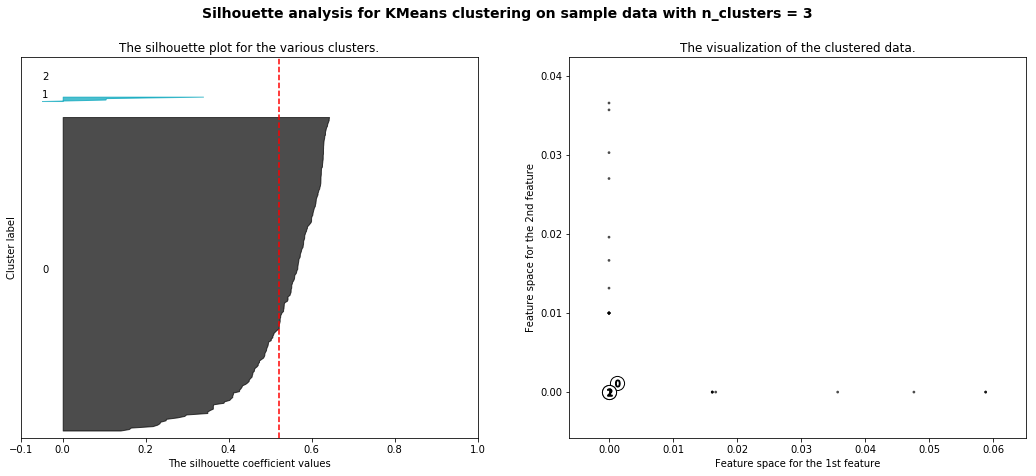

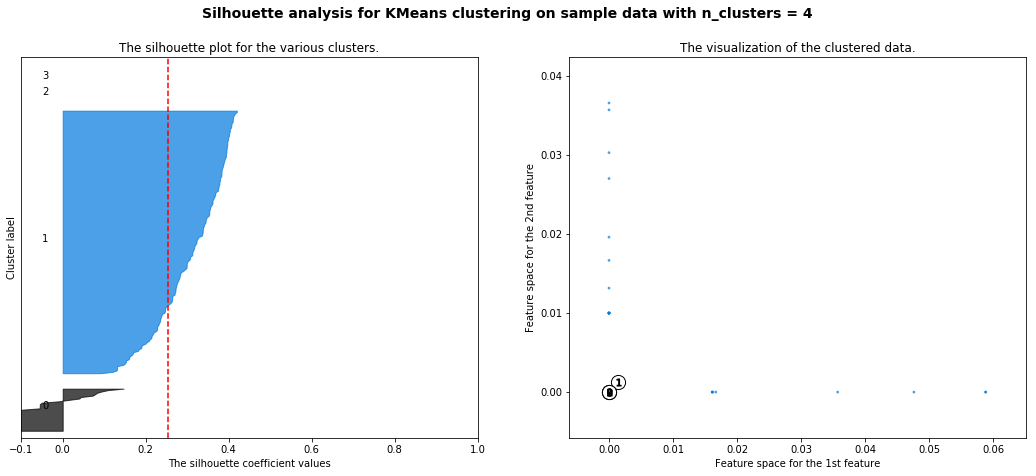

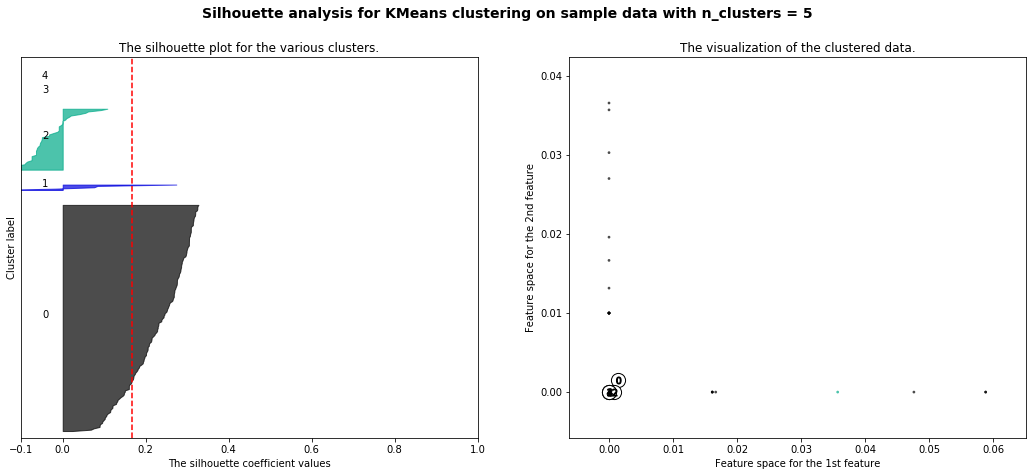

In [29]:
range_n_clusters=[2,3,4,5]
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 
    
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(chicago_grouped_clustering) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(chicago_grouped_clustering)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(chicago_grouped_clustering, cluster_labels)
    print("For", n_clusters, " Clusters  "
          "the average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(chicago_grouped_clustering, cluster_labels)

    y_lower = 5
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color1 = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color1, edgecolor=color1, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors2 = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(chicago_grouped_clustering.iloc[:, 0], chicago_grouped_clustering.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors2, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [41]:
kclusters = 5

chicago_grouped_clustering = chicago_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(chicago_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([4, 0, 4, 4, 4, 1, 1, 1, 4, 4, 4, 4, 4, 4, 1, 1, 4, 2, 4, 4, 1, 4,
       4, 4, 4, 4, 4, 4, 0, 4, 1, 1, 0, 1, 1, 4, 4, 4, 4, 4, 4, 1, 4, 4,
       1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 4, 1, 0, 4,
       1, 4, 4, 4, 0, 4, 4, 4, 1, 1, 4, 1, 1, 1, 4, 4, 4, 4, 4, 1, 1, 4,
       4, 4, 4, 4, 4, 1, 4, 3, 1, 1, 4, 1, 4, 4, 1, 1, 4, 4, 4, 4, 0, 4,
       4, 4, 0, 4, 1, 4, 4, 4, 4, 1, 0, 4, 4, 4, 4, 4, 4, 0, 4, 4, 1, 1,
       4, 1, 4, 4, 4, 4, 0, 4, 4, 4, 1, 4, 1, 4, 4, 1, 4, 4, 4, 4, 4, 0,
       1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 4, 4, 4, 4, 4, 4, 0,
       4, 1, 1, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1,
       1, 4, 1, 1, 4, 4, 1, 1, 1, 4, 4, 4, 1, 4, 4, 4, 4, 1, 4, 1, 1, 1,
       4], dtype=int32)

In [32]:
chicago_merged = df_chicago

chicago_merged.shape

(222, 3)

In [40]:
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [42]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [44]:
chicago_merged = df_chicago.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
#chicago_merged # check the last columns!
print(chicago_merged.shape)
chicago_merged = chicago_merged[np.isfinite(chicago_merged['Cluster Labels'])]
print(chicago_merged.shape)

(222, 14)
(221, 14)


In [45]:
chicago_merged.head()

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Albany Park,41.971937,-87.716174,4.0,Mexican Restaurant,Sandwich Place,Grocery Store,Korean Restaurant,Chinese Restaurant,Coffee Shop,Bakery,Restaurant,Supermarket,Gift Shop
1,Mayfair,41.968087,-87.737837,4.0,Middle Eastern Restaurant,Pizza Place,Ice Cream Shop,Intersection,Automotive Shop,Rental Car Location,Gym,Thai Restaurant,Seafood Restaurant,Campground
2,North Mayfair,41.968087,-87.737837,4.0,Middle Eastern Restaurant,Pizza Place,Ice Cream Shop,Intersection,Automotive Shop,Rental Car Location,Gym,Thai Restaurant,Seafood Restaurant,Campground
3,Ravenswood Manor,41.964622,-87.701380,4.0,Park,Coffee Shop,Train Station,Pizza Place,Middle Eastern Restaurant,Sandwich Place,Mexican Restaurant,Liquor Store,Vietnamese Restaurant,Bus Station
4,Archer Heights,41.811422,-87.726165,4.0,Mexican Restaurant,Mobile Phone Shop,Bakery,Gas Station,Grocery Store,Coffee Shop,Restaurant,Optical Shop,Candy Store,Sandwich Place


In [48]:
map_clusters = folium.Map(location=[latitude_x, longitude_y], zoom_start=11)
import matplotlib.colors as colors
# set color scheme for the clusters
x = np.arange(kclusters)
colors_array = cm.rainbow(np.linspace(0, 1, kclusters))
rainbow = [colors.rgb2hex(i) for i in colors_array]
print(rainbow)
# add markers to the map
markers_colors = []
for lat, lon, nei , cluster in zip(chicago_merged['Latitude'], chicago_merged['Longitude'], chicago_merged['Neighborhood'], chicago_merged['Cluster Labels']):
    label = folium.Popup(str(nei) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

['#8000ff', '#00b5eb', '#80ffb4', '#ffb360', '#ff0000']


In [55]:
df1=chicago_merged.loc[chicago_merged['Cluster Labels'] == 0,chicago_merged.columns[[0] + list(range(4, chicago_merged.shape[1]))]]
df1

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
18,North Austin,Grocery Store,Bus Station,Wings Joint,Athletics & Sports,Park,Shoe Repair,Gym,Dry Cleaner,Eastern European Restaurant,Electronics Store
19,South Austin,Grocery Store,Bus Station,Wings Joint,Athletics & Sports,Park,Shoe Repair,Gym,Dry Cleaner,Eastern European Restaurant,Electronics Store
36,Burnside,Park,Motel,Train Station,Fast Food Restaurant,Bus Station,Yoga Studio,Eye Doctor,Electronics Store,Empanada Restaurant,Ethiopian Restaurant
44,Marquette Park,Park,Convenience Store,Soccer Field,Liquor Store,Donut Shop,Cruise,Farmers Market,Ethiopian Restaurant,Costume Shop,Event Service
53,Prairie Shores,Park,Gym / Fitness Center,Rental Car Location,Gym,Fast Food Restaurant,Waterfront,Bike Rental / Bike Share,Pharmacy,Trail,Bus Station
75,Fuller Park,Park,Fast Food Restaurant,Light Rail Station,Sandwich Place,Pizza Place,Fried Chicken Joint,Chinese Restaurant,Event Space,Dry Cleaner,Eastern European Restaurant
132,Mount Greenwood,Park,Cosmetics Shop,Home Service,Yoga Studio,Farm,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Service,Event Space
140,Central Station,Grocery Store,Bus Station,Wings Joint,Athletics & Sports,Park,Shoe Repair,Gym,Dry Cleaner,Eastern European Restaurant,Electronics Store
169,Oakland,Park,Beach,Hotel,Liquor Store,Public Art,Trail,Music Venue,Discount Store,Juice Bar,Yoga Studio
172,Altgeld Gardens,Park,Yoga Studio,Farm,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Eye Doctor


In [56]:
df2=chicago_merged.loc[chicago_merged['Cluster Labels'] == 1,chicago_merged.columns[[0] + list(range(4, chicago_merged.shape[1]))]]
df2

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,Ashburn,Cosmetics Shop,Italian Restaurant,Liquor Store,Automotive Shop,Seafood Restaurant,Park,Gas Station,Clothing Store,Fried Chicken Joint,Light Rail Station
9,Beverly View,Fast Food Restaurant,Pizza Place,Park,Cosmetics Shop,Deli / Bodega,Burger Joint,Martial Arts Dojo,Bakery,Chinese Restaurant,Train Station
10,Crestline,Park,Fast Food Restaurant,Seafood Restaurant,Sports Bar,Mexican Restaurant,Shop & Service,Fried Chicken Joint,Furniture / Home Store,Liquor Store,Bar
13,Wrightwood,Fast Food Restaurant,Park,Cosmetics Shop,Light Rail Station,Liquor Store,Train Station,Bus Station,Fried Chicken Joint,Italian Restaurant,Bakery
14,Auburn Gresham,Boutique,Southern / Soul Food Restaurant,Park,Discount Store,American Restaurant,Currency Exchange,Fast Food Restaurant,Cosmetics Shop,Fish Market,Eye Doctor
15,Gresham,Lounge,Fried Chicken Joint,Mexican Restaurant,Health & Beauty Service,Supermarket,American Restaurant,Currency Exchange,Fast Food Restaurant,Liquor Store,Seafood Restaurant
16,Galewood,Grocery Store,Fast Food Restaurant,Clothing Store,Park,Thrift / Vintage Store,Discount Store,Gym,Supermarket,Seafood Restaurant,Liquor Store
20,West Humboldt Park,Fast Food Restaurant,Liquor Store,Soccer Field,Chinese Restaurant,Park,Food Truck,Mobile Phone Shop,Museum,Taco Place,Sushi Restaurant
21,Avalon Park,Boutique,Fast Food Restaurant,Cajun / Creole Restaurant,Sandwich Place,Park,Diner,Burger Joint,Grocery Store,Pizza Place,Field
22,Marynook,Fast Food Restaurant,Athletics & Sports,Grocery Store,Chinese Restaurant,Dry Cleaner,Sandwich Place,Supermarket,Jazz Club,Train Station,Seafood Restaurant


In [57]:
df3=chicago_merged.loc[chicago_merged['Cluster Labels'] == 2,chicago_merged.columns[[0] + list(range(4, chicago_merged.shape[1]))]]
df3

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
161,Big Oaks,Flower Shop,Yoga Studio,Farm,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Service,Event Space,Exhibit


In [58]:
df4=chicago_merged.loc[chicago_merged['Cluster Labels'] == 3,chicago_merged.columns[[0] + list(range(4, chicago_merged.shape[1]))]]
df4

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
179,Kensington,Martial Arts Dojo,Yoga Studio,Farm,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Eye Doctor


In [59]:
df5=chicago_merged.loc[chicago_merged['Cluster Labels'] == 4,chicago_merged.columns[[0] + list(range(4, chicago_merged.shape[1]))]]
df5

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Albany Park,Mexican Restaurant,Sandwich Place,Grocery Store,Korean Restaurant,Chinese Restaurant,Coffee Shop,Bakery,Restaurant,Supermarket,Gift Shop
1,Mayfair,Middle Eastern Restaurant,Pizza Place,Ice Cream Shop,Intersection,Automotive Shop,Rental Car Location,Gym,Thai Restaurant,Seafood Restaurant,Campground
2,North Mayfair,Middle Eastern Restaurant,Pizza Place,Ice Cream Shop,Intersection,Automotive Shop,Rental Car Location,Gym,Thai Restaurant,Seafood Restaurant,Campground
3,Ravenswood Manor,Park,Coffee Shop,Train Station,Pizza Place,Middle Eastern Restaurant,Sandwich Place,Mexican Restaurant,Liquor Store,Vietnamese Restaurant,Bus Station
4,Archer Heights,Mexican Restaurant,Mobile Phone Shop,Bakery,Gas Station,Grocery Store,Coffee Shop,Restaurant,Optical Shop,Candy Store,Sandwich Place
5,Armour Square,Chinese Restaurant,Pizza Place,Bar,Bus Station,Soccer Field,Light Rail Station,Gas Station,Tailor Shop,Storage Facility,Sports Bar
6,Chinatown,Chinese Restaurant,Asian Restaurant,Dessert Shop,Dim Sum Restaurant,Korean Restaurant,Seafood Restaurant,Pizza Place,Record Shop,Train Station,Fast Food Restaurant
7,Wentworth Gardens,Baseball Stadium,Sports Bar,Lounge,Fried Chicken Joint,Liquor Store,Gym / Fitness Center,Clothing Store,Light Rail Station,American Restaurant,Historic Site
11,Parkview,Mexican Restaurant,Bar,Pizza Place,Gym,Convenience Store,Sandwich Place,Chinese Restaurant,Liquor Store,Bakery,Karaoke Bar
12,Scottsdale,Furniture / Home Store,Mobile Phone Shop,Discount Store,Women's Store,Grocery Store,Pet Store,Pizza Place,Kids Store,Sandwich Place,Chinese Restaurant


In [60]:
clusters=pd.DataFrame({"Cluster1":df1["Neighborhood"],
                      "Cluster2":df2["Neighborhood"],
                      "Cluster3":df3["Neighborhood"],
                      "Cluster4":df4["Neighborhood"],
                      "Cluster5":df5["Neighborhood"]
                      })

In [61]:
clusters

,Cluster1,Cluster2,Cluster3,Cluster4,Cluster5
0,NaN,NaN,NaN,NaN,Albany Park
1,NaN,NaN,NaN,NaN,Mayfair
2,NaN,NaN,NaN,NaN,North Mayfair
3,NaN,NaN,NaN,NaN,Ravenswood Manor
4,NaN,NaN,NaN,NaN,Archer Heights
5,NaN,NaN,NaN,NaN,Armour Square
6,NaN,NaN,NaN,NaN,Chinatown
7,NaN,NaN,NaN,NaN,Wentworth Gardens
8,NaN,Ashburn,NaN,NaN,NaN
9,NaN,Beverly View,NaN,NaN,NaN


In [62]:
new_chicago=chicago_merged.set_index("Neighborhood",drop=True)
new_chicago.head()

,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
Neighborhood,,,,,,,,,,,,,
Albany Park,41.971937,-87.716174,4.0,Mexican Restaurant,Sandwich Place,Grocery Store,Korean Restaurant,Chinese Restaurant,Coffee Shop,Bakery,Restaurant,Supermarket,Gift Shop
Mayfair,41.968087,-87.737837,4.0,Middle Eastern Restaurant,Pizza Place,Ice Cream Shop,Intersection,Automotive Shop,Rental Car Location,Gym,Thai Restaurant,Seafood Restaurant,Campground
North Mayfair,41.968087,-87.737837,4.0,Middle Eastern Restaurant,Pizza Place,Ice Cream Shop,Intersection,Automotive Shop,Rental Car Location,Gym,Thai Restaurant,Seafood Restaurant,Campground
Ravenswood Manor,41.964622,-87.701380,4.0,Park,Coffee Shop,Train Station,Pizza Place,Middle Eastern Restaurant,Sandwich Place,Mexican Restaurant,Liquor Store,Vietnamese Restaurant,Bus Station
Archer Heights,41.811422,-87.726165,4.0,Mexican Restaurant,Mobile Phone Shop,Bakery,Gas Station,Grocery Store,Coffee Shop,Restaurant,Optical Shop,Candy Store,Sandwich Place


In [63]:
new_chicago_population=pd.DataFrame({
   
    "White":[65788,22334,21455,13443,13247,33445,12464,8764,7734,123344,67556,40141,40141,6638,6638,33597,33597,19093,17618,17618,21763,21763,20253,20253,14855,9447,26585,13040,17705],
"Black":[8667, 547, 696,1642,407, 1360, 3552,888,888, 754,1592,1592,1592,2633, 2633,1353,1353,655,1051,1051,236,236,666,666, 12333,1039,3531,5594,474],
"Hispanic":[4455,1213,1667,2544,5670, 4381,2089,907,888,1212,2318, 2318,2318, 949,949, 2078, 2078,1043,1065, 1065,887,887,989,989,3440,808,3010,3055,869],
 "Asian": [5666,8977,3445,6040,4279,15539,6140,1465,1465, 2176,4775,4775,4775,3404, 3404,9902,9902,1507,2210,2210,1263,1263,1575,1575,15057,2098,6656,7429,1748],
  "Hawaiian":[778,767,55,387,894,778,369,706,707, 95,206,206,206,93,93,324, 324,106,124,124,118,118,115,115,584,96,373, 210,125],  
"Indian":[1099,988,456,566,223,618,397,285,285,339,783,783,783,453,453,636,636,440,317,317,417,417,408,408,924,309,912,657,288],

}
)
new_chicago_population.head()

,White,Black,Hispanic,Asian,Hawaiian,Indian
0,65788,8667,4455,5666,778,1099
1,22334,547,1213,8977,767,988
2,21455,696,1667,3445,55,456
3,13443,1642,2544,6040,387,566
4,13247,407,5670,4279,894,223


In [64]:
new_chicago_population["Neighborhood"]=chicago_merged["Neighborhood"]

In [65]:
new_chicago_population

,White,Black,Hispanic,Asian,Hawaiian,Indian,Neighborhood
0,65788,8667,4455,5666,778,1099,Albany Park
1,22334,547,1213,8977,767,988,Mayfair
2,21455,696,1667,3445,55,456,North Mayfair
3,13443,1642,2544,6040,387,566,Ravenswood Manor
4,13247,407,5670,4279,894,223,Archer Heights
5,33445,1360,4381,15539,778,618,Armour Square
6,12464,3552,2089,6140,369,397,Chinatown
7,8764,888,907,1465,706,285,Wentworth Gardens
8,7734,888,888,1465,707,285,Ashburn
9,123344,754,1212,2176,95,339,Beverly View


In [68]:
chicago_school_ratings=pd.DataFrame({"Neighborhood":df_chicago["Neighborhood"],
        "Top School Rating":[9,7,8,8,5,6,7,9,4,4,4,10,7,4,4,5,6,4,3,6,10,5,5,9,4,4,4,3,4,2,
                            6,7,8,8,5,6,7,9,4,3,4,10,7,4,2,8,6,9,3,6,3,5,5,9,8,4,2,6,7,10,
                            10,7,8,6,5,6,7,9,4,4,4,1,7,4,4,5,6,4,3,6,10,5,7,8,4,9,3,3,2,8,
                            8,7,8,2,5,6,7,9,4,4,6,3,7,4,9,5,6,8,3,6,10,5,7,9,4,1,4,3,8,2,
                            3,7,8,5,5,6,7,9,8,4,4,8,2,1,4,5,6,2,3,6,6,5,3,2,4,2,2,3,7,8,
                            2,7,8,8,5,6,7,9,4,9,4,3,7,8,4,5,6,7,3,6,4,5,5,9,4,4,8,3,9,5,
                            1,7,8,8,5,6,7,9,2,4,9,6,7,6,4,5,6,8,3,6,7,5,6,7,4,2,5,3,4,2,
                            8,3,8,6,5,6,7,3,4,4,7,2]})

In [69]:
chicago_school_ratings

,Neighborhood,Top School Rating
0,Albany Park,9
1,Mayfair,7
2,North Mayfair,8
3,Ravenswood Manor,8
4,Archer Heights,5
5,Armour Square,6
6,Chinatown,7
7,Wentworth Gardens,9
8,Ashburn,4
9,Beverly View,4


In [70]:
chicago_school_ratings.set_index('Neighborhood',inplace=True,drop=True)

In [75]:
data = [go.Bar(
            x=df_chicago["Neighborhood"],
            y=[9,7,8,8,5,6,7,9,4,4,4,10,7,4,4,5,6,4,3,6,10,5,5,9,4,4,4,3,4,2,
               6,7,8,8,5,6,7,9,4,3,4,10,7,4,2,8,6,9,3,6,3,5,5,9,8,4,2,6,7,10,
               10,7,8,6,5,6,7,9,4,4,4,1,7,4,4,5,6,4,3,6,10,5,7,8,4,9,3,3,2,8,
               8,7,8,2,5,6,7,9,4,4,6,3,7,4,9,5,6,8,3,6,10,5,7,9,4,1,4,3,8,2,
               3,7,8,5,5,6,7,9,8,4,4,8,2,1,4,5,6,2,3,6,6,5,3,2,4,2,2,3,7,8,
               2,7,8,8,5,6,7,9,4,9,4,3,7,8,4,5,6,7,3,6,4,5,5,9,4,4,8,3,9,5,
               1,7,8,8,5,6,7,9,2,4,9,6,7,6,4,5,6,8,3,6,7,5,6,7,4,2,5,3,4,2,
               8,3,8,6,5,6,7,3,4,4,7,2],
     marker=dict(
        color='rgb(158,120,225)',
        line=dict(
            color='rgb(8,48,107)',
            width=1.5,
        )
    ),
    opacity=0.6
    )]

py.iplot(data, filename='basic-bar')

In [76]:
Chicago_Avg_HousingPrice=pd.DataFrame({"Neighborhood":df_chicago["Neighborhood"],
                                      "Average_Housing_Price":[172050.0,343500.0,297860.0,202000.0,279200.0,225740.0,225800.0,373570.0,370507.0,255400.0,436540.0,433500.0,335060.0,335408.0,286600.0,286600.0,187300.0,175700.0,225900.0,239440.0,363400.0,433700.0,233580.0,335200.0,335070.0,286620.0,286690.0,433600.0,233580.0,355060.0,335540.0,286500.0,286650.0,433580.0,433509.0,339005.0,335700.0,286606.0,586670.0,833590.0,433507.0,335080.0,375096.0,286600.0,286604.0,433501.0,433800.0,335009.0,335600.0,286680.0,286100.0,432500.0,433700.0,335030.0,335200.0,283600.0,486600.0,533560.0,434500.0,335090.0,333000.0,286630.0,286600.0,433200.0,333100.0,335040.0,339000.0,286300.0,286600.0,431500.0,433200.0,335000.0,335300.0,286200.0,286600.0,432500.0,439500.0,335900.0,335100.0,286600.0,286600.0,433500.0,433500.0,335000.0,335200.0,286200.0,286100.0,372050.0,343500.0,291900.0,202000.0,279200.0,225000.0,225090.0,370500.0,390200.0,255200.0,437500.0,533300.0,335000.0,335600.0,286600.0,286900.0,187730.0,175030.0,225900.0,219490.0,363700.0,483500.0,433020.0,335080.0,335000.0,286600.0,286100.0,433870.0,434364.0,335000.0,365750.0,286600.0,286568.0,433500.0,433974.0,335000.0,335070.0,286600.0,286770.0,433500.0,433220.0,335560.0,335450.0,282340.0,118660.0,433500.0,436680.0,337670.0,335000.0,286780.0,286680.0,433500.0,433550.0,335095.0,335540.0,286606.0,286765.0,433500.0,433544.0,335677.0,335744.0,286440.0,286550.0,433500.0,435650.0,335450.0,335040.0,286650.0,286600.0,433600.0,433300.0,335800.0,365000.0,233600.0,286600.0,434400.0,438600.0,335790.0,335000.0,282450.0,286550.0,433330.0,433500.0,335550.0,335000.0,286450.0,286600.0,172450.0,343500.0,233900.0,206600.0,279200.0,225600.0,225000.0,370500.0,370500.0,255400.0,435600.0,433700.0,335000.0,335700.0,286600.0,286600.0,187300.0,175000.0,225900.0,219400.0,363400.0,433500.0,436600.0,335000.0,336000.0,286600.0,284550.0,433500.0,433560.0,335000.0,335000.0,286700.0,286600.0,436670.0,433500.0,335560.0,335000.0,284550.0,286600.0,235660.0,433580.0,335560.0,337880.0,286600.0,286790.0,433500.0,433990.0,335000.0
                                      ]})

In [77]:
Chicago_Avg_HousingPrice.set_index('Neighborhood',inplace=True,drop=True)

In [78]:
data = [go.Bar(
            x=df_chicago["Neighborhood"],
            y=[172050.0,343500.0,297860.0,202000.0,279200.0,225740.0,225800.0,373570.0,370507.0,255400.0,436540.0,433500.0,335060.0,335408.0,286600.0,286600.0,187300.0,175700.0,225900.0,239440.0,363400.0,433700.0,233580.0,335200.0,335070.0,286620.0,286690.0,433600.0,233580.0,355060.0,335540.0,286500.0,286650.0,433580.0,433509.0,339005.0,335700.0,286606.0,586670.0,833590.0,433507.0,335080.0,375096.0,286600.0,286604.0,433501.0,433800.0,335009.0,335600.0,286680.0,286100.0,432500.0,433700.0,335030.0,335200.0,283600.0,486600.0,533560.0,434500.0,335090.0,333000.0,286630.0,286600.0,433200.0,333100.0,335040.0,339000.0,286300.0,286600.0,431500.0,433200.0,335000.0,335300.0,286200.0,286600.0,432500.0,439500.0,335900.0,335100.0,286600.0,286600.0,433500.0,433500.0,335000.0,335200.0,286200.0,286100.0,372050.0,343500.0,291900.0,202000.0,279200.0,225000.0,225090.0,370500.0,390200.0,255200.0,437500.0,533300.0,335000.0,335600.0,286600.0,286900.0,187730.0,175030.0,225900.0,219490.0,363700.0,483500.0,433020.0,335080.0,335000.0,286600.0,286100.0,433870.0,434364.0,335000.0,365750.0,286600.0,286568.0,433500.0,433974.0,335000.0,335070.0,286600.0,286770.0,433500.0,433220.0,335560.0,335450.0,282340.0,118660.0,433500.0,436680.0,337670.0,335000.0,286780.0,286680.0,433500.0,433550.0,335095.0,335540.0,286606.0,286765.0,433500.0,433544.0,335677.0,335744.0,286440.0,286550.0,433500.0,435650.0,335450.0,335040.0,286650.0,286600.0,433600.0,433300.0,335800.0,365000.0,233600.0,286600.0,434400.0,438600.0,335790.0,335000.0,282450.0,286550.0,433330.0,433500.0,335550.0,335000.0,286450.0,286600.0,172450.0,343500.0,233900.0,206600.0,279200.0,225600.0,225000.0,370500.0,370500.0,255400.0,435600.0,433700.0,335000.0,335700.0,286600.0,286600.0,187300.0,175000.0,225900.0,219400.0,363400.0,433500.0,436600.0,335000.0,336000.0,286600.0,284550.0,433500.0,433560.0,335000.0,335000.0,286700.0,286600.0,436670.0,433500.0,335560.0,335000.0,284550.0,286600.0,235660.0,433580.0,335560.0,337880.0,286600.0,286790.0,433500.0,433990.0,335000.0
                                      ],
     marker=dict(
        color='green',
        line=dict(
            color='green',
            width=1.5,
        )
    ),
    opacity=0.6
    )]

py.iplot(data, filename='basic-bar')

In [79]:
new_chicago_population["Neighborhood"]=chicago_merged["Neighborhood"]
new_chicago_population1=new_chicago_population.set_index("Neighborhood")
new_chicago_population1.head()

,White,Black,Hispanic,Asian,Hawaiian,Indian
Neighborhood,,,,,,
Albany Park,65788,8667,4455,5666,778,1099
Mayfair,22334,547,1213,8977,767,988
North Mayfair,21455,696,1667,3445,55,456
Ravenswood Manor,13443,1642,2544,6040,387,566
Archer Heights,13247,407,5670,4279,894,223


Now lets compare 2 neighborhoods to choose one that best matches our requirements as given below

* More Indian Population
* Higher School Rating
* Reasonable Housing Price in the Range of 300k to 500k
* Comfortable Neighborhoods

In [95]:
Nei1=input("Enter the Neighborhood: ")

Enter the Neighborhood: Armour Square 


In [96]:
Nei2=input("Enter the Neighborhood: ")

Enter the Neighborhood: Parkview 


In [97]:
Venue_comparison=new_chicago.loc[[Nei1,Nei2]].T
Venue_comparison

Neighborhood,Armour Square,Parkview
Latitude,41.84,41.9406
Longitude,-87.6331,-87.7232
Cluster Labels,4,4
1st Most Common Venue,Chinese Restaurant,Mexican Restaurant
2nd Most Common Venue,Pizza Place,Bar
3rd Most Common Venue,Bar,Pizza Place
4th Most Common Venue,Bus Station,Gym
5th Most Common Venue,Soccer Field,Convenience Store
6th Most Common Venue,Light Rail Station,Sandwich Place
7th Most Common Venue,Gas Station,Chinese Restaurant


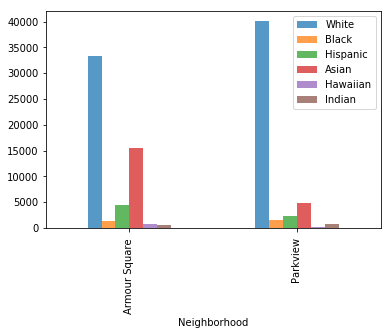

In [98]:
Population_Comparison=new_chicago_population1.loc[[Nei1,Nei2]]
Population_Comparison.plot(kind='bar',alpha=0.75)
plt.show()

In [99]:
Population_Comparison['Indian']

Neighborhood
Armour Square     618
Parkview          783
Name: Indian, dtype: int64

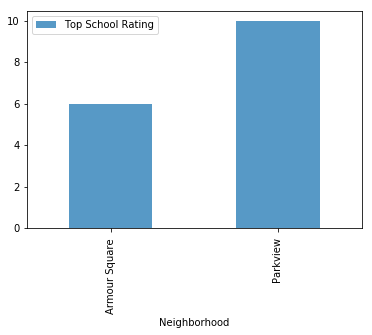

In [100]:
School_rating_comparison=chicago_school_ratings.loc[[Nei1,Nei2]]
School_rating_comparison.plot(kind='bar',alpha=0.75);
plt.show()

In [101]:
School_rating_comparison

,Top School Rating
Neighborhood,
Armour Square,6
Parkview,10


In [102]:
Avg_housing_price_comparison= Chicago_Avg_HousingPrice.loc[[Nei1,Nei2]]
Avg_housing_price_comparison

,Average_Housing_Price
Neighborhood,
Armour Square,225740.0
Parkview,433500.0


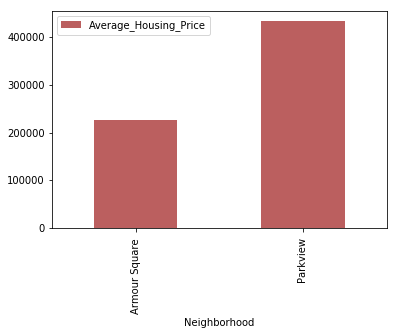

In [103]:
Avg_housing_price_comparison.plot(kind='bar',alpha=0.75,color='brown');
plt.show()